In [ ]:
# 한글폰트 설정

# 나눔글꼴 설치
!apt-get install -y fonts-nanum > /dev/null

# matplotlib 폰트 캐시 갱신
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 캐시 폴더 삭제 → 자동 재생성 유도
os.system("rm -rf " + matplotlib.get_cachedir())

#경고 무시
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

In [ ]:
# 필요한 모듈 import
import sys
import pandas as pd
import scipy.stats as spst
import numpy as np
from IPython.display import display

In [ ]:
# 최종 점수 코드

# 1. 8개 기준에 대한 데이터 입력
# 1번 기준 결과
population_stop_scores = {
    '중구': 25, '동대문구': 24, '종로구': 23, '용산구': 22, '양천구': 21, '광진구': 20, '관악구': 19, '송파구': 18, '강남구': 17, '금천구': 16, '서대문구': 15, '강북구': 14, '동작구': 13, '영등포구': 12, '중랑구': 11, '도봉구': 10, '강동구': 9, '은평구': 8, '구로구': 7, '서초구': 6, '성북구': 5, '노원구': 4, '마포구': 3, '성동구': 2, '강서구': 1
}

#2번 기준 결과
moving_time_scores = {
    '강동구': 25, '송파구': 24, '강서구': 23, '은평구': 22, '노원구': 21, '도봉구': 20, '강북구': 19, '강남구': 18, '중랑구': 17, '금천구': 16, '관악구': 15, '서초구': 14, '구로구': 13, '양천구': 12, '광진구': 11, '성북구': 10, '마포구': 9, '서대문구': 8, '동작구': 7, '동대문구': 6, '영등포구': 5, '성동구': 4, '종로구': 3, '용산구': 2, '중구': 1
}

# 3번 기준 결과
space_scores = {
    '중구': 25, '금천구': 24, '동대문구': 23, '동작구': 22, '광진구': 21, '용산구': 20, '서대문구': 19, '구로구': 18, '성동구': 17, '강북구': 16, '양천구': 15, '종로구': 14, '관악구': 13, '도봉구': 12, '성북구': 11, '영등포구': 10, '중랑구': 9, '마포구': 8, '강동구': 7, '은평구': 6, '송파구': 5, '강남구': 4, '서초구': 3, '노원구': 2, '강서구': 1
}

# 4번 기준 결과
commuter_population_scores = {
    '강남구': 25, '중구': 24, '송파구': 23, '서초구': 22, '마포구': 21, '영등포구': 20, '강서구': 19, '종로구': 18, '강동구': 17, '양천구': 16, '관악구': 15, '광진구': 14, '노원구': 13, '성동구': 12, '동대문구': 11, '구로구': 10, '은평구': 9, '성북구': 8, '금천구': 7, '용산구': 6,'동작구': 5, '서대문구': 4, '중랑구': 3, '강북구': 2, '도봉구': 1
}

# 5번 기준 결과
moving_people_scores = {
    '강남구': 25, '종로구': 24, '서초구': 23, '구로구': 22, '동작구': 21, '금천구': 20, '중구': 19, '양천구': 18, '강북구': 17, '관악구': 16, '마포구': 15, '동대문구': 14, '용산구': 13, '도봉구': 12, '은평구': 11, '서대문구': 10, '노원구': 9, '성동구': 8, '강동구': 7, '중랑구': 6, '영등포구': 5, '송파구': 4, '강서구': 3, '성북구': 2, '광진구': 1
}

# 6번 기준 결과
subway_population_scores = {
		'중구': 25, '마포구': 24, '종로구': 23, '동작구': 22, '강남구': 21, '성동구': 20, '영등포구': 19, '구로구': 18, '송파구': 17, '은평구': 16, '광진구': 15, '노원구': 14, '강동구': 13, '동대문구': 12, '도봉구': 11, '서초구': 10, '강서구': 9, '용산구': 8, '관악구': 7, '중랑구': 6, '금천구': 5, '양천구': 4, '서대문구': 3, '성북구': 2, '강북구': 1
}

# 7번 기준 결과
elderly_population_scores = {
    '강북구': 25, '도봉구': 24, '중구': 23, '은평구': 22, '중랑구': 21, '종로구': 20, '동대문구': 19, '구로구': 18, '노원구': 17, '서대문구': 16, '성북구': 15, '동작구': 14, '금천구': 13, '용산구': 12, '강서구': 11, '강동구': 10, '관악구': 9, '성동구': 8, '영등포구': 7, '양천구': 6, '송파구': 5, '광진구': 4, '서초구': 3, '강남구': 2, '마포구': 1
}

# 8번 기준 결과
foreigner_scores = {
    '구로구': 25, '영등포구': 24, '동대문구': 23, '용산구': 21, '금천구': 21, '광진구': 20, '관악구': 19, '서대문구': 18, '중구': 17, '마포구': 16, '종로구': 15, '동작구': 14, '성북구': 13, '성동구': 12, '송파구': 11, '강동구': 10, '중랑구': 9, '강서구': 8, '양천구': 7, '노원구': 6, '강남구': 5, '강북구': 4, '은평구': 3, '서초구': 2, '도봉구': 1
}


#2. 가중치 설졍
all_scores = [
    population_stop_scores,
    moving_time_scores,
    space_scores,
    commuter_population_scores,
    moving_people_scores,
    subway_population_scores,
    elderly_population_scores,
    foreigner_scores
]

weights = [
    0.18,  # population_stop_scores의 가중치
    0.18,  # moving_time_scores의 가중치
    0.18,  # space_scores의 가중치
    0.13,  # commuter_population_scores의 가중치
    0.13,  # moving_people_scores의 가중치
    0.10,  # subway_population_scores의 가중치
    0.05,  # elderly_population_scores의 가중치
    0.05   # foreigner_scores의 가중치
]

# 3. 최종 점수 계산
final_scores = {}
all_districts = moving_time_scores.keys()

for district in all_districts:
    total_weighted_score = 0

    for i in range(len(all_scores)):
        score_dict = all_scores[i]
        weight = weights[i]

        # 혹시 딕셔너리에 해당 구가 없으면(예: '증량구' 오타), 0점으로 처리하여 오류 방지
        score = score_dict.get(district, 0)

        # 점수 * 가중치
        total_weighted_score += score * weight


    final_scores[district] = total_weighted_score

# 4. 최종 순위
# 딕셔너리를 '값(최종 점수)'을 기준으로 내림차순(높은 점수가 1위) 정렬
ranked_districts = sorted(final_scores.items(), key=lambda item: item[1], reverse=True)

# 5. 결과 출력
print("--- 자치구별 가중치 합산 점수 및 순위 ---")
rank = 1
for district, score in ranked_districts:
    # 점수는 소수점 2자리까지만 표시
    print(f"{rank}위: {district} (최종 점수: {score:.2f})")
    rank += 1

--- 자치구별 가중치 합산 점수 및 순위 ---
1위: 중구 (최종 점수: 19.27)
2위: 종로구 (최종 점수: 16.71)
3위: 동대문구 (최종 점수: 16.09)
4위: 강남구 (최종 점수: 15.97)
5위: 금천구 (최종 점수: 15.79)
6위: 구로구 (최종 점수: 14.95)
7위: 관악구 (최종 점수: 14.59)
8위: 동작구 (최종 점수: 14.54)
9위: 송파구 (최종 점수: 14.47)
10위: 양천구 (최종 점수: 14.11)
11위: 광진구 (최종 점수: 14.01)
12위: 용산구 (최종 점수: 12.84)
13위: 강북구 (최종 점수: 12.84)
14위: 강동구 (최종 점수: 12.80)
15위: 은평구 (최종 점수: 11.93)
16위: 도봉구 (최종 점수: 11.60)
17위: 영등포구 (최종 점수: 11.56)
18위: 마포구 (최종 점수: 11.53)
19위: 서대문구 (최종 점수: 11.38)
20위: 서초구 (최종 점수: 11.24)
21위: 노원구 (최종 점수: 10.27)
22위: 중랑구 (최종 점수: 9.93)
23위: 성동구 (최종 점수: 9.74)
24위: 강서구 (최종 점수: 9.21)
25위: 성북구 (최종 점수: 7.58)


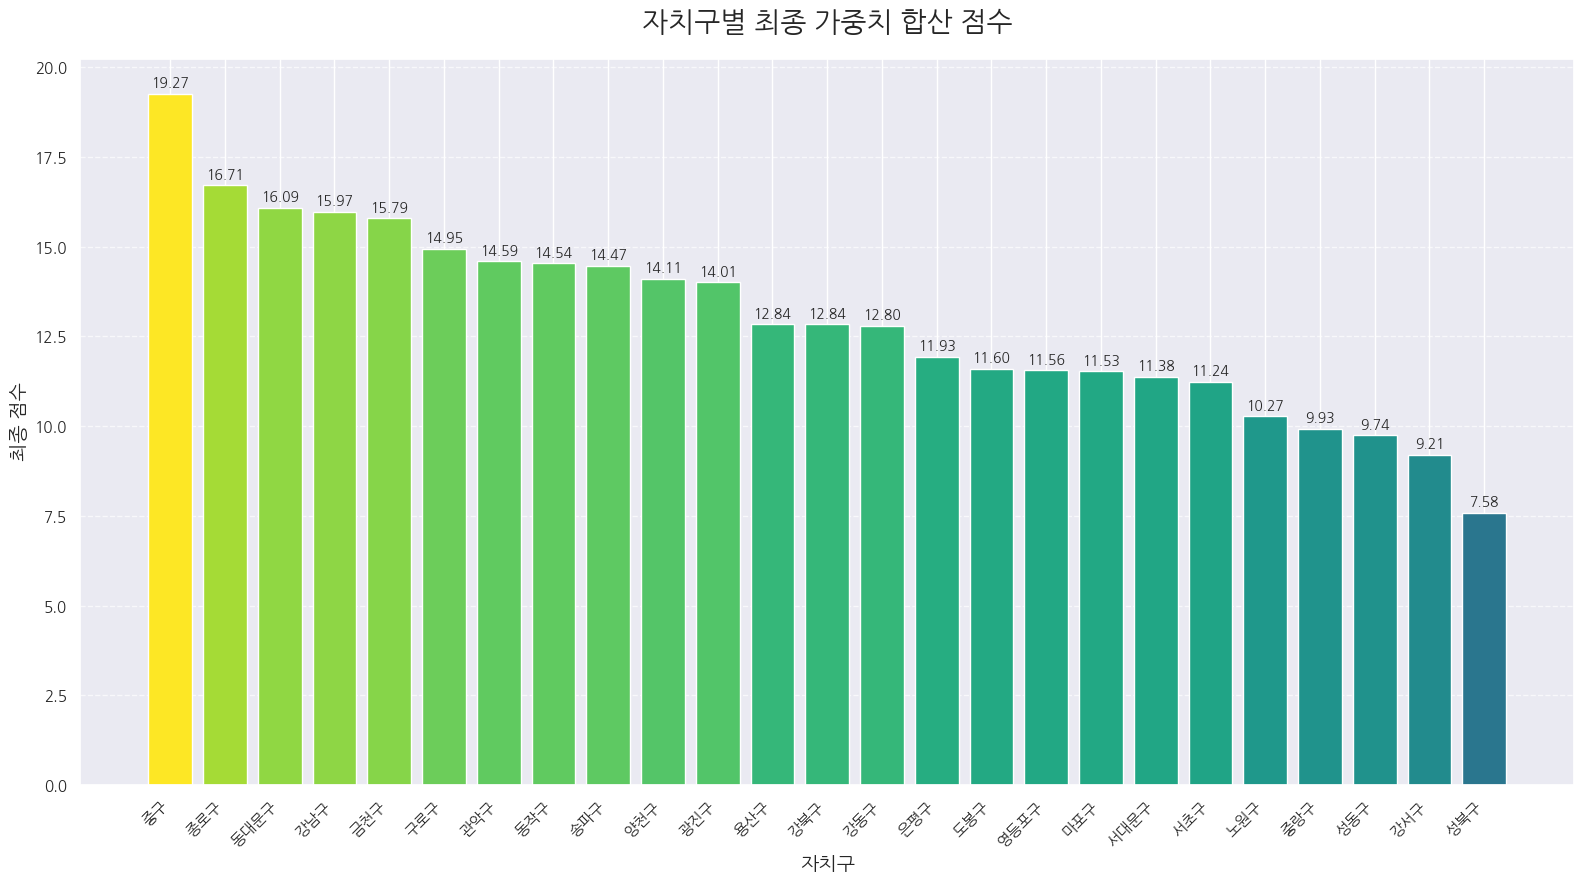

In [ ]:
# 점수 시각화

import matplotlib.pyplot as plt
import pandas as pd
import platform
import os

df_scores = pd.DataFrame(list(final_scores.items()), columns=['자치구', '최종 점수'])

# 점수 기준으로 내림차순 정렬
df_scores_sorted = df_scores.sort_values(by='최종 점수', ascending=False)

# 시각화
plt.figure(figsize=(16, 9)) # 그래프 크기 설정

# 색상 팔레트 생성 (viridis 컬러맵 사용)
# 점수가 높을수록 밝은 색(노란색 계열), 낮을수록 어두운 색(파란색 계열)
colors = plt.cm.viridis(df_scores_sorted['최종 점수'] / float(max(df_scores_sorted['최종 점수'])))

# 막대 그래프 생성
bars = plt.bar(df_scores_sorted['자치구'], df_scores_sorted['최종 점수'], color=colors)

# 제목 및 레이블
plt.title('자치구별 최종 가중치 합산 점수', fontsize=20, pad=20)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('최종 점수', fontsize=14)

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=45, ha='right')

# y축 그리드(격자) 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 점수 값(레이블) 표시
for bar in bars:
    yval = bar.get_height()
    # 소수점 2자리까지 표시
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

# 레이아웃 조정 (그래프가 잘리지 않도록 함)
plt.tight_layout()
plt.show()

In [ ]:
# 인접한 2개 구의 평균 점수 계산

# 1. 서울시 25개구 인접 지도 데이터 (Adjacency Map)
adj_map = {
    '강남구': ['서초구', '송파구', '성동구'],
    '강동구': ['송파구', '광진구'],
    '강북구': ['성북구', '도봉구'],
    '강서구': ['양천구', '마포구', '영등포구'],
    '관악구': ['서초구', '동작구', '영등포구', '구로구', '금천구'],
    '광진구': ['성동구', '중랑구', '송파구', '강동구'],
    '구로구': ['양천구', '영등포구', '관악구', '금천구'],
    '금천구': ['구로구', '관악구'],
    '노원구': ['도봉구', '성북구', '중랑구'],
    '도봉구': ['강북구', '성북구', '노원구'],
    '동대문구': ['성북구', '중랑구', '성동구', '종로구'],
    '동작구': ['용산구', '서초구', '관악구', '영등포구'],
    '마포구': ['은평구', '서대문구', '중구', '용산구', '영등포구', '강서구'],
    '서대문구': ['은평구', '종로구', '중구', '마포구', '용산구'],
    '서초구': ['강남구', '송파구', '관악구', '동작구', '용산구'],
    '성동구': ['중구', '용산구', '광진구', '동대문구', '중랑구', '강남구'],
    '성북구': ['종로구', '동대문구', '강북구', '도봉구', '노원구', '중랑구'],
    '송파구': ['강남구', '서초구', '광진구', '강동구'],
    '양천구': ['강서구', '구로구', '영등포구'],
    '영등포구': ['양천구', '강서구', '마포구', '용산구', '동작구', '관악구', '구로구'],
    '용산구': ['중구', '성동구', '서초구', '동작구', '영등포구', '마포구', '서대문구'],
    '은평구': ['서대문구', '종로구', '마포구'],
    '종로구': ['은평구', '서대문구', '중구', '성북구', '동대문구'],
    '중구': ['종로구', '서대문구', '마포구', '용산구', '성동구'],
    '중랑구': ['노원구', '성북구', '동대문구', '광진구']
}

# 2. 평균 점수 계산
adjacent_averages = []
processed_pairs = set()  # 중복 계산 방지 (예: '강남-서초'와 '서초-강남')

# final_scores 딕셔너리는 이전 코드 3번에서 이미 계산됨
for district, neighbors in adj_map.items():
    for neighbor in neighbors:
        # (A, B)와 (B, A)를 동일하게 처리하기 위해 정렬
        pair = tuple(sorted((district, neighbor)))

        # 아직 계산하지 않은 인접 쌍이라면
        if pair not in processed_pairs:
            score1 = final_scores.get(pair[0], 0)  # 자치구1의 최종 점수
            score2 = final_scores.get(pair[1], 0)  # 자치구2의 최종 점수
            average = (score1 + score2) / 2

            adjacent_averages.append((pair[0], pair[1], average))
            processed_pairs.add(pair)  # 계산 완료된 쌍으로 등록

# 3. 인접 2개 구 평균 점수 순위 매기기
ranked_averages = sorted(adjacent_averages, key=lambda item: item[2], reverse=True)

# 4. 결과 출력
print("\n" + "--- 인접 2개 구 평균 점수 최고 지역 (상위 10개) ---")
for i in range(min(10, len(ranked_averages))):  # 상위 10개만 출력
    rank = i + 1
    pair_data = ranked_averages[i]
    print(f"{rank}위: {pair_data[0]} & {pair_data[1]} (평균 점수: {pair_data[2]:.2f})")


--- 인접 2개 구 평균 점수 최고 지역 (상위 10개) ---
1위: 종로구 & 중구 (평균 점수: 17.99)
2위: 동대문구 & 종로구 (평균 점수: 16.40)
3위: 용산구 & 중구 (평균 점수: 16.05)
4위: 마포구 & 중구 (평균 점수: 15.40)
5위: 구로구 & 금천구 (평균 점수: 15.37)
6위: 서대문구 & 중구 (평균 점수: 15.33)
7위: 강남구 & 송파구 (평균 점수: 15.22)
8위: 관악구 & 금천구 (평균 점수: 15.19)
9위: 관악구 & 구로구 (평균 점수: 14.77)
10위: 관악구 & 동작구 (평균 점수: 14.56)


In [ ]:
# 인접 3개 구 (서로 모두 인접, 순환) 평균 점수 계산
adj_map = {
    '강남구': ['서초구', '송파구', '성동구'],
    '강동구': ['송파구', '광진구'],
    '강북구': ['성북구', '도봉구'],
    '강서구': ['양천구', '마포구', '영등포구'],
    '관악구': ['서초구', '동작구', '영등포구', '구로구', '금천구'],
    '광진구': ['성동구', '중랑구', '송파구', '강동구'],
    '구로구': ['양천구', '영등포구', '관악구', '금천구'],
    '금천구': ['구로구', '관악구'],
    '노원구': ['도봉구', '성북구', '중랑구'],
    '도봉구': ['강북구', '성북구', '노원구'],
    '동대문구': ['성북구', '중랑구', '성동구', '종로구'],
    '동작구': ['용산구', '서초구', '관악구', '영등포구'],
    '마포구': ['은평구', '서대문구', '중구', '용산구', '영등포구', '강서구'],
    '서대문구': ['은평구', '종로구', '중구', '마포구', '용산구'],
    '서초구': ['강남구', '송파구', '관악구', '동작구', '용산구'],
    '성동구': ['중구', '용산구', '광진구', '동대문구', '중랑구', '강남구'],
    '성북구': ['종로구', '동대문구', '강북구', '도봉구', '노원구', '중랑구'],
    '송파구': ['강남구', '서초구', '광진구', '강동구'],
    '양천구': ['강서구', '구로구', '영등포구'],
    '영등포구': ['양천구', '강서구', '마포구', '용산구', '동작구', '관악구', '구로구'],
    '용산구': ['중구', '성동구', '서초구', '동작구', '영등포구', '마포구', '서대문구'],
    '은평구': ['서대문구', '종로구', '마포구'],
    '종로구': ['은평구', '서대문구', '중구', '성북구', '동대문구'],
    '중구': ['종로구', '서대문구', '마포구', '용산구', '성동구'],
    '중랑구': ['노원구', '성북구', '동대문구', '광진구']
}

# 2. '삼각형' 클러스터 찾기 및 평균 점수 계산
triplet_averages = []
processed_triplets = set()  # 중복 계산 방지 (예: A-B-C, A-C-B...)

# final_scores 딕셔너리는 이전 코드 3번에서 이미 계산됨
all_districts = adj_map.keys()

for dist_A in all_districts:
    neighbors_A = set(adj_map[dist_A])  # A의 이웃들

    for dist_B in neighbors_A:
        # A와 B는 이웃함. B의 이웃을 찾는다.
        neighbors_B = set(adj_map[dist_B])

        # 'A의 이웃'이면서 동시에 'B의 이웃'인 C를 찾는다
        common_neighbors = neighbors_A.intersection(neighbors_B)

        for dist_C in common_neighbors:
            # A, B, C는 '삼각형'을 이룬다.
            # 중복 방지를 위해 정렬된 튜플을 사용
            triplet = tuple(sorted((dist_A, dist_B, dist_C)))

            if triplet not in processed_triplets:
                score1 = final_scores.get(triplet[0], 0)
                score2 = final_scores.get(triplet[1], 0)
                score3 = final_scores.get(triplet[2], 0)
                average = (score1 + score2 + score3) / 3

                triplet_averages.append((triplet[0], triplet[1], triplet[2], average))
                processed_triplets.add(triplet)

# 3. 인접 3개 구 평균 점수 순위 매기기
ranked_triplets = sorted(triplet_averages, key=lambda item: item[3], reverse=True)

# 4. 결과 출력
print("\n" + "--- 인접 3개 구(순환) 평균 점수 최고 지역 (TOP 10) ---")
for i in range(min(10, len(ranked_triplets))):  # 상위 10개만 출력
    rank = i + 1
    triplet_data = ranked_triplets[i]
    print(f"{rank}위: {triplet_data[0]} & {triplet_data[1]} & {triplet_data[2]} (평균 점수: {triplet_data[3]:.2f})")


--- 인접 3개 구(순환) 평균 점수 최고 지역 (TOP 10) ---
1위: 서대문구 & 종로구 & 중구 (평균 점수: 15.79)
2위: 관악구 & 구로구 & 금천구 (평균 점수: 15.11)
3위: 마포구 & 용산구 & 중구 (평균 점수: 14.55)
4위: 서대문구 & 용산구 & 중구 (평균 점수: 14.50)
5위: 마포구 & 서대문구 & 중구 (평균 점수: 14.06)
6위: 성동구 & 용산구 & 중구 (평균 점수: 13.95)
7위: 강남구 & 서초구 & 송파구 (평균 점수: 13.89)
8위: 강동구 & 광진구 & 송파구 (평균 점수: 13.76)
9위: 관악구 & 구로구 & 영등포구 (평균 점수: 13.70)
10위: 관악구 & 동작구 & 영등포구 (평균 점수: 13.56)


In [ ]:
# 시각화
import folium

# --- 1. 각 구청의 위도, 경도 정보 ---
locations_data = [
    {
        'name': '서대문구청',
        'latlng': [37.5790985, 126.9368444],
        'address': '서울특별시 서대문구 연희로 248'
    },
    {
        'name': '종로구청',
        'latlng': [37.5730506, 126.9789448],
        'address': '서울특별시 종로구 삼봉로 43'
    },
    {
        'name': '중구청',
        'latlng': [37.5635704, 126.997851],
        'address': '서울특별시 중구 창경궁로 17'
    }
]


# --- 2. 지도의 중심점 계산 ---
avg_lat = sum(loc['latlng'][0] for loc in locations_data) / len(locations_data)
avg_lon = sum(loc['latlng'][1] for loc in locations_data) / len(locations_data)
map_center = [avg_lat, avg_lon]

# --- 3. Folium 지도 생성 ---
m = folium.Map(location=map_center, zoom_start=13)

# --- 4. 마커 및 폴리곤 추가 ---
points = []

for loc in locations_data:
    latlng = loc['latlng']
    name = loc['name']
    address = loc['address']

    points.append(latlng)

    # 팝업에 표시할 HTML 내용 (주소도 함께)
    popup_html = f"<b>{name}</b><br>{address}"

    # 지도 위에 글자를 직접 표시하기 위해 마커 위에 텍스트를 오버레이하는 커스텀 HTML 아이콘 사용
    # 이 방법은 텍스트가 항상 보이고, 지도를 확대/축소해도 크기가 유지됩니다.
    html_template = f"""
    <div style="font-weight: bold; font-size: 12px; color: black; text-align: center; white-space: nowrap;">
        <i class="fa fa-bus fa-2x" style="color: blue;"></i><br>
    </div>
    """

    # HTML을 포함하는 Folium DivIcon 생성
    bus_icon = folium.features.DivIcon(
        icon_size=(100, 36), # 아이콘의 크기 (글자 길이에 따라 조절)
        icon_anchor=(50, 18), # 아이콘 앵커 (중앙에 오도록)
        html=html_template,
    )

    # 지도에 마커 추가 (버스 아이콘과 구 이름 포함)
    folium.Marker(
        location=latlng,
        popup=folium.Popup(popup_html, max_width=300),
        icon=bus_icon # 커스텀 아이콘 사용
    ).add_to(m)

# 3개 지점을 잇는 '삼각형 클러스터' 폴리곤 추가
folium.Polygon(
    locations=points,
    color='#00008B',      # 진한 파란색 선
    fill=True,
    fill_color='#ADD8E6', # 연한 파란색 채우기
    fill_opacity=0.3,
    tooltip="1위 클러스터 (종로구-중구-서대문구)"
).add_to(m)

# --- 5. (시각화) 파일 저장 대신 지도 객체 'm'을 바로 출력 ---
m